<a href="https://colab.research.google.com/github/satya2909/ML_concepts/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/br_can_data.csv")
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [ ]:
features = ["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean"]
df = df.dropna(subset=features)

In [ ]:
data = df[features].copy()

In [ ]:
data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430
...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200


**STEP-1 Scaling the data**

We subtract the minimum value of the column from each value and divide with the range of the values (max value - min value)

Then we scale the vue range (here in scale of 1-100)

In [ ]:
data = ((data-data.min())/(data.max()-data.min()))
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**STEP-2 Allocating random centeroids**

.sample() selects a random value and sets it as the centeroid we can specify the number of centeroids to be taken

.apply() does the same for every column of the table

In [ ]:
def ran_centeroids (data , k ):
  centeroids =[]
  for i in range(k):
    centeroid = data.apply(lambda x: float(x.sample()))
    centeroids.append(centeroid)
  return pd.concat(centeroids, axis =1)

In [ ]:
centroids= ran_centeroids(data, 6)

<ipython-input-8-6ed87228f294>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centeroid = data.apply(lambda x: float(x.sample()))


In [ ]:
centroids

,0,1,2,3,4,5
radius_mean,0.204411,0.593923,0.723603,0.329358,0.309953,0.284869
texture_mean,0.121069,0.218803,0.287792,0.619547,0.241123,0.219817
perimeter_mean,0.123350,0.285398,0.657246,0.550135,0.138000,0.154861
area_mean,0.099555,0.086320,0.173150,0.191177,0.363733,0.260912
smoothness_mean,0.395053,0.410671,0.406699,0.429448,0.258193,0.167193
compactness_mean,0.625483,0.293908,0.121097,0.133427,0.126403,0.133489
concavity_mean,0.201640,0.038707,0.106560,0.054756,0.264761,0.421509
concave points_mean,0.017256,0.129225,0.636183,0.000000,0.261034,0.173111


**STEP-3 Lable each datapoint to respective clusters


We will calculate the euclidian distance of each data point from every centeroid and then decide to which cluster should the data point be alloted.

We allot the points to the closest cluster.

In [ ]:
def put_labels(data , centroids):
  distances = centroids.apply(lambda x: np.sqrt(((data-x)**2).sum(axis=1)))
  return distances.idxmin(axis=1)


In [ ]:
labels = put_labels(data, centroids)
labels.value_counts()

,count
4,241
1,105
2,101
3,57
0,44
5,21


**STEP-4 Updating the centroids of the clusters**


In [ ]:
def update_centroids(data, labels, k):
  return (data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T)

**STEP-5 Plotting the data on to the graph**

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

def plot_clusters(data, labels, centroids, iteration):
  pca = PCA(n_components=3)
  data_3d = pca.fit_transform(data)
  centroids_3d = pca.transform(centroids.T)
  clear_output(wait=True)
  plt.title(f'Iteration {iteration}')
  plt.scatter(data_3d[:,0], data_3d[:,1], c=labels)
  plt.scatter(centroids_3d[:,0], centroids_3d[:,1], marker='P', s=300, c='#050505')
  plt.show()

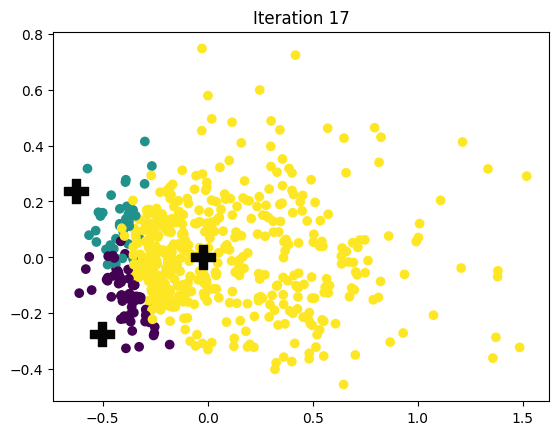

In [ ]:
max_iterations = 100
k=4

centroids = ran_centeroids(data, k)
old_centroids = pd.DataFrame()
iterations = 1

while iterations < max_iterations and not centroids.equals(old_centroids):
  old_centroids = centroids

  labels = put_labels(data, centroids)
  centroids = update_centroids(data, labels, k)
  plot_clusters(data, labels, centroids, iterations)
  iterations += 1